In [54]:
import pandas
import altair as alt
from scipy.optimize import curve_fit
import numpy
import datetime

In [55]:
state = 'NY'
data = pandas.read_csv("https://covidtracking.com/api/states/daily.csv")
data['date'] =  pandas.to_datetime(data['date'], format='%Y%m%d')
data = data[data['state'] == state][['date','positive','negative']].sort_values('date')


In [56]:
data['new cases'] = data['positive'].diff()

In [57]:
data

,date,positive,negative,new cases
1367,2020-03-04,6.0,48.0,NaN
1350,2020-03-05,22.0,76.0,16.0
1323,2020-03-06,33.0,92.0,11.0
1282,2020-03-07,76.0,92.0,43.0
1231,2020-03-08,105.0,92.0,29.0
1180,2020-03-09,142.0,92.0,37.0
1129,2020-03-10,173.0,92.0,31.0
1078,2020-03-11,216.0,92.0,43.0
1027,2020-03-12,216.0,92.0,0.0
976,2020-03-13,421.0,2779.0,205.0


In [58]:
melted = data.melt('date')

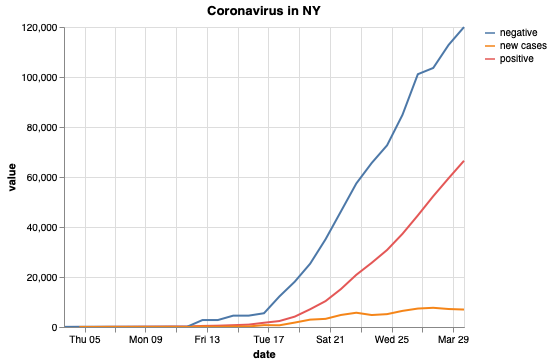

In [59]:
alt.Chart(melted).mark_line().encode(
    x='date',
    y='value',
    color=alt.Color('variable', legend=alt.Legend(title=""))
).properties(
    title='Coronavirus in ' + state
)

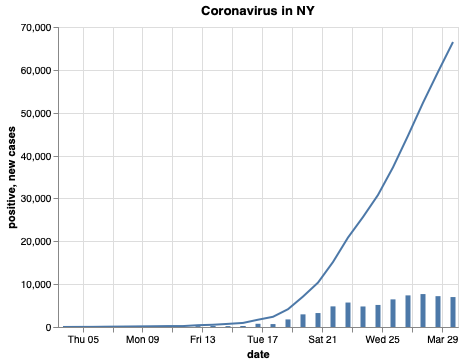

In [60]:
alt.Chart(data[['date', 'positive']]).mark_line().encode(
    x='date',
    y='positive'
) + alt.Chart(data[['date', 'new cases']]).mark_bar().encode(
    x='date',
    y='new cases'
).properties(
    title='Coronavirus in ' + state
) 




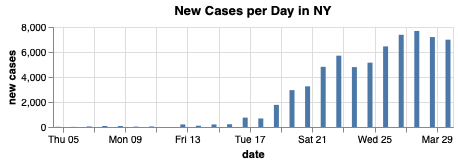

In [61]:
alt.Chart(data, height=100).mark_bar().encode(
    x='date',
    y='new cases'
).properties(
    title='New Cases per Day in ' + state
)